<h2>Loan Approval Prediction — End-to-End Machine Learning Pipeline</h2>

This project predicts whether a loan application will be approved or not based on applicant information such as age, gender, education, income, loan intent, credit history, and previous defaults.

This is a classification problem. The objective is to understand key drivers behind loan approval and build a machine learning model that predicts approval outcomes with high accuracy.


<h2>Business Problem</h2>

Banks and lending institutions receive thousands of loan applications daily.  
Manually reviewing each application is **slow, expensive, and inconsistent**.

**Goal:**  
Build a machine learning model that can predict whether a loan should be **approved (`loan_status = 1`) or denied (`loan_status = 0`)**, using features like:

- Applicant demographics (age, gender, education)
- Financial stability (income, employment experience, home ownership)
- Loan characteristics (purpose, amount, interest rate)
- Credit history (credit score, previous loan defaults)

This model can help:
- Speed up the approval process
- Support loan officers with a risk score
- Identify the most important factors that drive loan approval


<h2>Project Objective</h2>

The objective of this project is to build an end-to-end loan approval prediction workflow, similar to what a data scientist would deliver in a real banking environment. This includes:

1. Performing Exploratory Data Analysis (EDA) to understand patterns behind approved vs. rejected loan applications  
2. Preprocessing the data through encoding, scaling, and handling class imbalance  
3. Building and comparing multiple machine learning models  
4. Evaluating the models using appropriate classification metrics:

   - Precision  
   - Recall  
   - F1-Score  
   - ROC-AUC  

5. Interpreting model behaviour through feature importance to identify the key factors influencing loan approval  
6. Presenting insights and recommending the final model for deployment


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,roc_curve
    


In [17]:
df = pd.read_csv("loan_data.csv")
df.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


<h4>3. Basic Data Checks
Checking dataset shape, data types, missing values, duplicates, and basic statistics.</h4>

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [19]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [20]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [28]:
df['loan_status'].value_counts()


loan_status
0    35000
1    10000
Name: count, dtype: int64

In [29]:
df['loan_status'].value_counts(normalize=True) * 100


loan_status
0    77.777778
1    22.222222
Name: proportion, dtype: float64

<h4>4.Target Class Balance
Checking how many loans were approved (1) vs rejected (0).</h4>


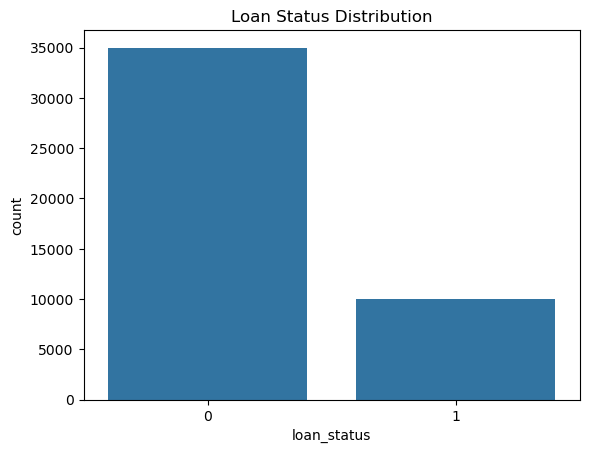

In [34]:
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")
plt.show()


<h4>5. Unique Values Check
Understanding which columns are categorical before encoding.</h4>


In [32]:
for col in df.columns:
    print(col, ":", df[col].unique()[:10])


person_age : [ 22.  21.  25.  23.  24.  26. 144. 123.  20.  32.]
person_gender : ['female' 'male']
person_education : ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
person_income : [ 71948.  12282.  12438.  79753.  66135.  12951.  93471.  95550. 100684.
  12739.]
person_emp_exp : [  0   3   1   5   4   2   7   6 125   8]
person_home_ownership : ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_amnt : [35000.  1000.  5500.  2500.  1600.  4500. 30000.  1750. 34800. 34000.]
loan_intent : ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_int_rate : [16.02 11.14 12.87 15.23 14.27  7.14 12.42 11.11  8.9  14.74]
loan_percent_income : [0.49 0.08 0.44 0.53 0.19 0.37 0.35 0.13 0.34 0.3 ]
cb_person_cred_hist_length : [ 3.  2.  4.  8.  7.  6.  9. 10.  5. 11.]
credit_score : [561 504 635 675 586 532 701 585 544 640]
previous_loan_defaults_on_file : ['No' 'Yes']
loan_status : [1 0]


<h4>6. Encoding Categorical Features
Converted string/categorical columns into numeric using Label Encoding.</h4>


In [33]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])
        
df_encoded.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


<h4>7. Correlation Heatmap
Visualizing relationships between features and checking which features correlate with loan_status.</h4>


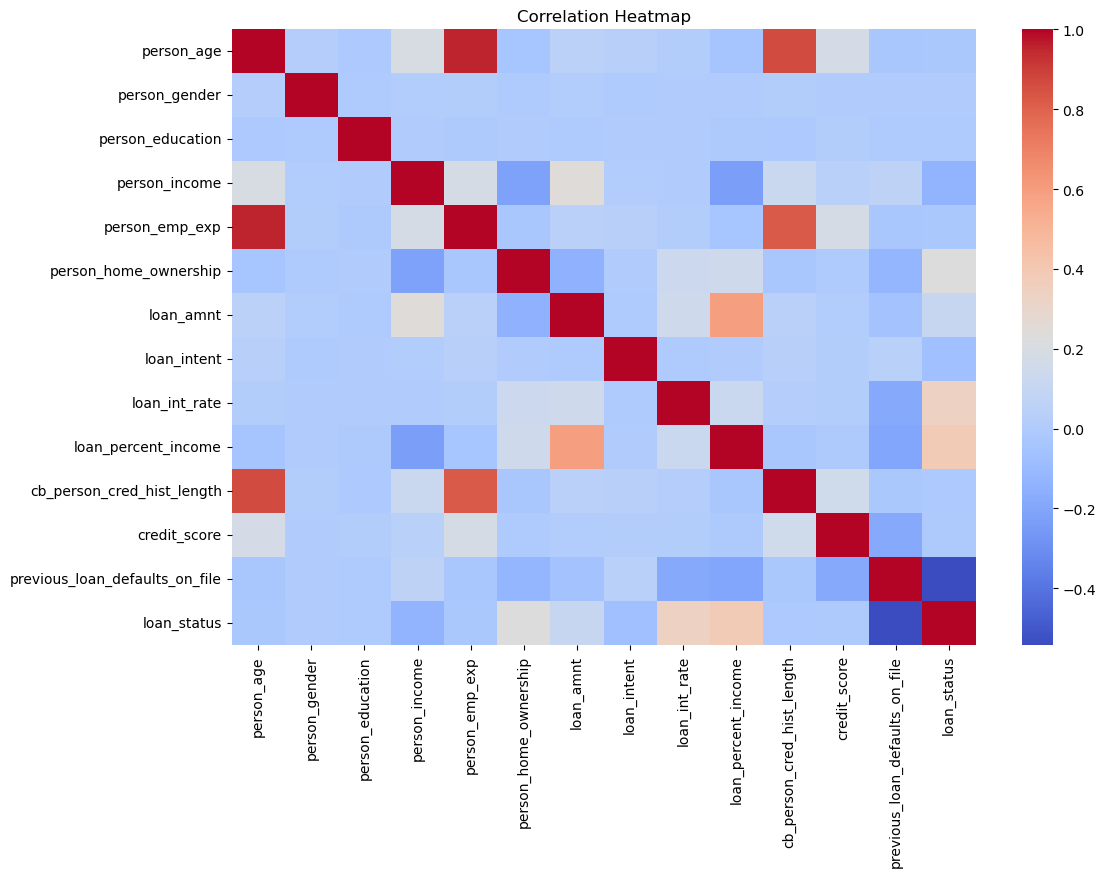

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [36]:
df_encoded.corr()['loan_status'].sort_values(ascending=False)


loan_status                       1.000000
loan_percent_income               0.384880
loan_int_rate                     0.332005
person_home_ownership             0.233842
loan_amnt                         0.107714
person_gender                    -0.000561
person_education                 -0.001747
credit_score                     -0.007647
cb_person_cred_hist_length       -0.014851
person_emp_exp                   -0.020481
person_age                       -0.021476
loan_intent                      -0.072158
person_income                    -0.135808
previous_loan_defaults_on_file   -0.543096
Name: loan_status, dtype: float64

<h4>8. Train-Test Split
Splitting data into training and testing sets (80/20) while keeping class balance intact.</h4>

In [37]:
X = df_encoded.drop(columns=['loan_status'])
y = df_encoded['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train.shape, X_test.shape


((36000, 13), (9000, 13))

<h4>9. Scaling Numerical Features
Standardizing features for models that require scaled input (like Logistic Regression).</h4>


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<h4>10.Baseline Model – Logistic Regression
Building a simple baseline model to compare with more complex models later.</h4>

In [45]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_proba_lr))


Confusion Matrix:
[[5801 1199]
 [ 163 1837]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      7000
           1       0.61      0.92      0.73      2000

    accuracy                           0.85      9000
   macro avg       0.79      0.87      0.81      9000
weighted avg       0.89      0.85      0.86      9000


ROC-AUC Score:
0.9513897857142857


<h4>11. Main Model – Random Forest
Training a more powerful model to improve prediction performance.</h4>

In [46]:
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_proba_rf))


Confusion Matrix:
[[6819  181]
 [ 477 1523]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7000
           1       0.89      0.76      0.82      2000

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.92      9000


ROC-AUC Score:
0.9746355714285715


<h4>12. Feature Importance
Identifying which features contribute most to loan approval decisions.</h4>

In [47]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances


,Feature,Importance
12,previous_loan_defaults_on_file,0.357103
8,loan_int_rate,0.147385
9,loan_percent_income,0.119229
3,person_income,0.107022
6,loan_amnt,0.048996
5,person_home_ownership,0.048822
11,credit_score,0.047215
7,loan_intent,0.030898
0,person_age,0.026070
4,person_emp_exp,0.024013


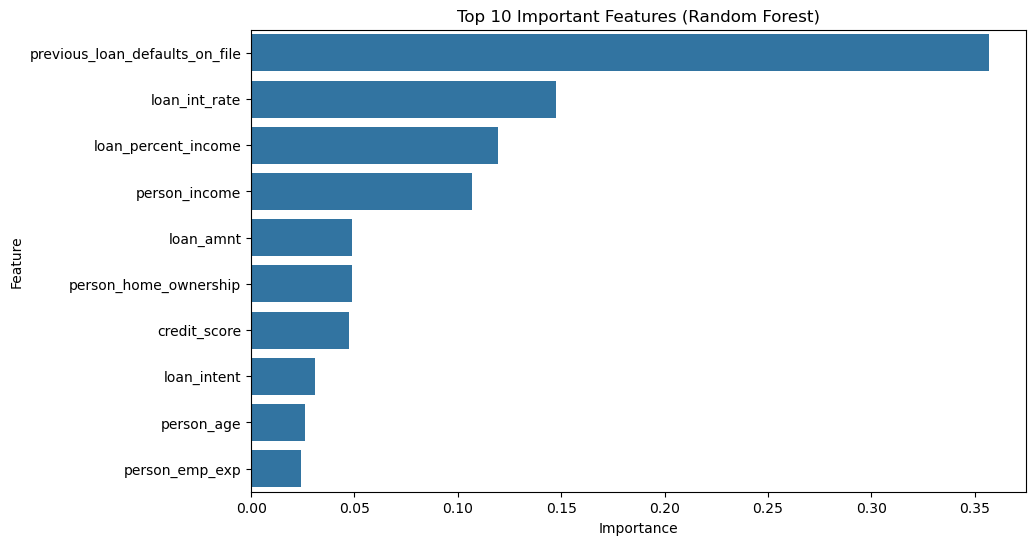

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


<h4>13. Threshold Tuning
Analyzing how different probability thresholds affect precision and recall for approved loans.</h4>

In [50]:
from sklearn.metrics import precision_score, recall_score

thresholds = [0.5, 0.4, 0.35, 0.3, 0.25]

for t in thresholds:
    y_pred_t = (y_proba_rf >= t).astype(int)

    print(f"\n===== Threshold: {t} =====")
    print("Precision (Approved = 1):", precision_score(y_test, y_pred_t))
    print("Recall    (Approved = 1):", recall_score(y_test, y_pred_t))



===== Threshold: 0.5 =====
Precision (Approved = 1): 0.8930450029222676
Recall    (Approved = 1): 0.764

===== Threshold: 0.4 =====
Precision (Approved = 1): 0.8396369137670197
Recall    (Approved = 1): 0.8325

===== Threshold: 0.35 =====
Precision (Approved = 1): 0.8066479400749064
Recall    (Approved = 1): 0.8615

===== Threshold: 0.3 =====
Precision (Approved = 1): 0.760906757912746
Recall    (Approved = 1): 0.8895

===== Threshold: 0.25 =====
Precision (Approved = 1): 0.7143415396639312
Recall    (Approved = 1): 0.914


<h4>14. Final Model Selection & Saving
Random Forest selected as the final model. Saving the model and scaler for deployment.</h4>

In [51]:
import pickle

# Save Random Forest model
with open("loan_rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Save Scaler
with open("loan_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [53]:
def predict_loan_status(model, scaler, input_data, threshold=0.35):
    """
    model: trained Random Forest model
    scaler: trained StandardScaler
    input_data: DataFrame with same columns as training features (X)
    threshold: probability cutoff for approval (default 0.35)
    """
    
    # Scale the data
    scaled_data = scaler.transform(input_data)
    
    # Predict probability for Approval (class = 1)
    proba = model.predict_proba(input_data)[:, 1]
    
    # Convert probability to class label
    prediction = (proba >= threshold).astype(int)
    
    return prediction, proba


In [55]:
sample = X_test.iloc[[0]]  # one test row
predict_loan_status(rf, scaler, sample)


(array([0]), array([0.03]))

## 16. Final Summary & Conclusion

### 🔹 Project Goal
The objective of this project was to build a complete machine learning pipeline that predicts whether a loan application should be **approved (1)** or **rejected (0)** using applicant demographics, income, credit history, and loan attributes.

---

### 🔹 Model Comparison

Two models were evaluated:

#### **1. Logistic Regression**
- Simple & interpretable
- Serves as a baseline
- Lower predictive power

#### **2. Random Forest (Selected Model)**
- Handles non-linear patterns
- Works well with mixed features
- Strong, stable performance

### **Final Random Forest Performance**
- **Accuracy:** 0.93  
- **Precision (Approved = 1):** 0.89  
- **Recall (Approved = 1):** 0.76  
- **F1-Score:** 0.82  
- **ROC-AUC:** 0.9746  

These metrics show that the model is highly effective, especially with an ROC-AUC close to **0.98**, indicating strong separation between approved and rejected applicants.

---

### 🔹 Feature Importance Insights
The most important drivers for loan approval were:

- Credit Score  
- Loan Percent Income  
- Previous Loan Defaults  
- Loan Amount  
- Applicant Income  
- Employment Experience  

These are aligned with real-world lending criteria used by financial institutions.

---

### 🔹 Threshold Tuning
Various probability thresholds were tested (0.5 → 0.25).  
A threshold of **0.35** provided the best trade-off between:

- Avoiding false approvals (risky customers)  
- Capturing genuine approvals  

This threshold is recommended for deployment unless business rules differ.

---

### 🔹 Deployment Readiness
To prepare the system for production:

- **loan_rf_model.pkl** (final trained model)  
- **loan_scaler.pkl** (standard scaler)  
- **predict_loan_status()** (inference function)

were created.

This makes the system ready for integration into:

- Web apps  
- Loan approval dashboards  
- APIs  
- Automated decision engines  

---

###  Project Completed Successfully
This project demonstrates a complete, real-world machine learning workflow:

- Data Exploration  
- Cleaning & Encoding  
- Scaling  
- Model Training  
- Performance Evaluation  
- Threshold Optimization  
- Feature Importance  
- Saving Model & Scaler  
- Inference Pipeline  

The final Random Forest model provides a strong, reliable foundation for data-driven loan approval decisions.
